In [1]:
import numpy as np
from matplotlib import pylab as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join, realpath
import re

mypath = 'C:/Users/e0546063/python_projects/spin_glass'
os.chdir(mypath)

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] == "asc"]
files

for file in files:
    file1 = open(file, 'r')
    
        
    plt.imshow()
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(name)
    ax1.plot(x, y)
    ax2.plot(x, -y)
    
    plt.title(file)
    plt.legend()
    plt.savefig(file, bbox_inches='tight', dpi = 200)
    plt.show()
    plt.close()

C:\Users\e0546063\python_projects\spin_glass


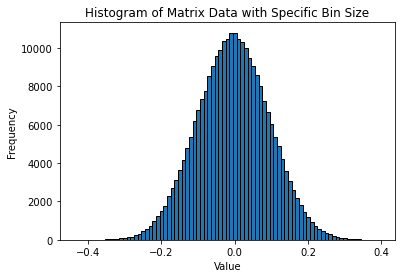

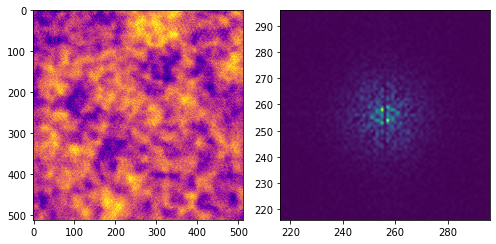

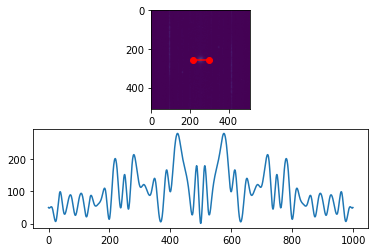

In [132]:
import numpy as np
from matplotlib import pylab as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import scipy.ndimage

path = 'C:/Users/e0546063/python_projects/spin_glass'
os.chdir(path)
mypath = os.getcwd()
print(mypath)

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] == "asc"]
#files

file_path = "SC_003-Phase_140nm_thick_lift_50nm_0G_1_61K-bwd.asc.asc"
data = np.loadtxt(file_path)

flattened_data = data.flatten()

# Step 3: Compute Histogram
# Specify the bin size
bin_size = 0.01

# Compute histogram
hist, bins = np.histogram(flattened_data, bins=np.arange(min(flattened_data), max(flattened_data) + bin_size, bin_size))

# Step 4: Plot Histogram
# Plot histogram
plt.bar(bins[:-1], hist, width=bin_size, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Matrix Data with Specific Bin Size')
plt.show()



# Compute the 2D FFT
fft_data = np.fft.fft2(data)
# Shift zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))
ax1.imshow(data, vmin = -0.2, vmax=0.2, cmap='plasma')
ax2.imshow(np.abs(fft_shifted), interpolation = 'spline16', cmap='viridis')
plt.xlim(216, 296)
plt.ylim(216, 296)
fig.tight_layout()
plt.show()

#-- Extract the line...
# Make a line with "num" points...
x0, y0 = 216, 256 # These are in _pixel_ coordinates!!
x1, y1 = 296, 256
num = 1000
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

# Extract the values along the line, using cubic interpolation
zi = scipy.ndimage.map_coordinates(np.abs(fft_shifted), np.vstack((x,y)))

#-- Plot...
fig, axes = plt.subplots(nrows=2)
axes[0].imshow(np.abs(fft_shifted))
axes[0].plot([x0, x1], [y0, y1], 'ro-')
axes[0].axis('image')

axes[1].plot(zi)

plt.show()

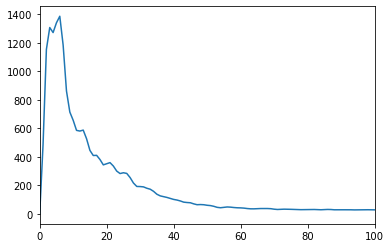

In [162]:
import math 

theta = 0
n = 360
zi_sum = 0
i = 0

while theta<2*math.pi:
    #print(theta*360/(2*math.pi))
    ro = 256
    xn = len(fft_shifted[0])/2
    yn = len(fft_shifted[1])/2
    x0 = xn #- ro*np.cos(theta)
    y0 = yn #- ro*np.sin(theta)
    x1 = xn + ro*np.cos(theta)
    y1 = yn + ro*np.sin(theta)
    num = 500
    x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
    
    # Extract the values along the line, using cubic interpolation
    zi = scipy.ndimage.map_coordinates(np.abs(fft_shifted), np.vstack((x,y)))
    
    zi_sum = zi_sum + zi
    i = i+1
    
    #fig, axes = plt.subplots(nrows=2)
    #axes[0].imshow(np.abs(fft_shifted))
    #axes[0].plot([x0, x1], [y0, y1], 'ro-')
    #axes[0].axis('image')
    #axes[1].plot(zi)
    #plt.show()
    
    theta = theta + 2*math.pi/n
    
zi_av = zi_sum/i
plt.plot(zi_av)
plt.xlim(0, 100)
#plt.ylim(216, 296)
plt.show()

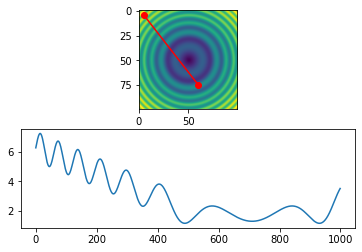

In [119]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

#-- Generate some data...
x, y = np.mgrid[-5:5:0.1, -5:5:0.1]
z = np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2)

#-- Extract the line...
# Make a line with "num" points...
x0, y0 = 5, 4.5 # These are in _pixel_ coordinates!!
x1, y1 = 60, 75
num = 1000
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

# Extract the values along the line, using cubic interpolation
zi = scipy.ndimage.map_coordinates(z, np.vstack((x,y)))

#-- Plot...
fig, axes = plt.subplots(nrows=2)
axes[0].imshow(z)
axes[0].plot([x0, x1], [y0, y1], 'ro-')
axes[0].axis('image')

axes[1].plot(zi)

plt.show()

## AFM/MFM image plotter

In [32]:
import numpy as np
from matplotlib import pylab as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import scipy.ndimage
import math 

path = 'C:/Users/e0546063/python_projects/spin_glass/140_nm_-_mfield'
os.chdir(path)
mypath = os.getcwd()
#print(mypath)

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] == "asc"]
#files

i = 1

for file in files:
    data = np.loadtxt(file)
    dpi = 100
    plt.figure(figsize = (1024/dpi,1024/dpi))
    fig = plt.imshow(data, vmin = -0.6, vmax=0.6, cmap='gray')
    plt.axis('off')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    #fig.tight_layout()
    #filename = file + '.jpg'
    filename = str(i) + '.jpg'
    #figsize=(1.024, 1.024), dpi=100
    plt.savefig(filename, bbox_inches='tight', pad_inches = 0, dpi = 132.5)
    #plt.show()
    plt.close()
    i = i + 1
    

## Single image processing (MFM - phase dist - FFT - aver FFT)

C:\Users\e0546063\python_projects\spin_glass


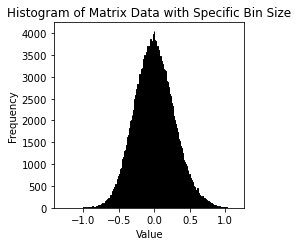

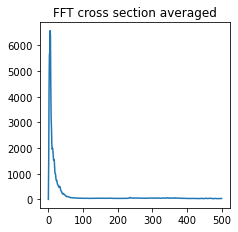

In [34]:
import numpy as np
from matplotlib import pylab as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import scipy.ndimage
import math 

path = 'C:/Users/e0546063/python_projects/spin_glass'
os.chdir(path)
mypath = os.getcwd()
print(mypath)

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] == "asc"]
#files

file_path = "SC_041-Phase_140nm_thick_lift_30nm_2500G_1_61K-bwd.asc.asc"
data = np.loadtxt(file_path)

# Compute histogram
flattened_data = data.flatten()
bin_size = 0.01
hist, bins = np.histogram(flattened_data, bins=np.arange(min(flattened_data), max(flattened_data) + bin_size, bin_size))

# Plot histogram
plt.bar(bins[:-1], hist, width=bin_size, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Matrix Data with Specific Bin Size')
plt.show()

# Compute the 2D FFT
fft_data = np.fft.fft2(data)
# Shift zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_data)


theta = 0
n = 360
zi_sum = 0
i = 0

while theta<2*math.pi:
    #print(theta*360/(2*math.pi))
    ro = 256
    xn = len(fft_shifted[0])/2
    yn = len(fft_shifted[1])/2
    x0 = xn #- ro*np.cos(theta)
    y0 = yn #- ro*np.sin(theta)
    x1 = xn + ro*np.cos(theta)
    y1 = yn + ro*np.sin(theta)
    num = 500
    x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
    
    # Extract the values along the line, using cubic interpolation
    zi = scipy.ndimage.map_coordinates(np.abs(fft_shifted), np.vstack((x,y)))
    
    zi_sum = zi_sum + zi
    i = i+1
    
    #fig, axes = plt.subplots(nrows=2)
    #axes[0].imshow(np.abs(fft_shifted))
    #axes[0].plot([x0, x1], [y0, y1], 'ro-')
    #axes[0].axis('image')
    #axes[1].plot(zi)
    #plt.show()
    
    theta = theta + 2*math.pi/n
    
zi_av = zi_sum/i

plt.plot(zi_av)
#plt.xlim(0, 100)
#plt.ylim(216, 296)
plt.title('FFT cross section averaged')
plt.show()

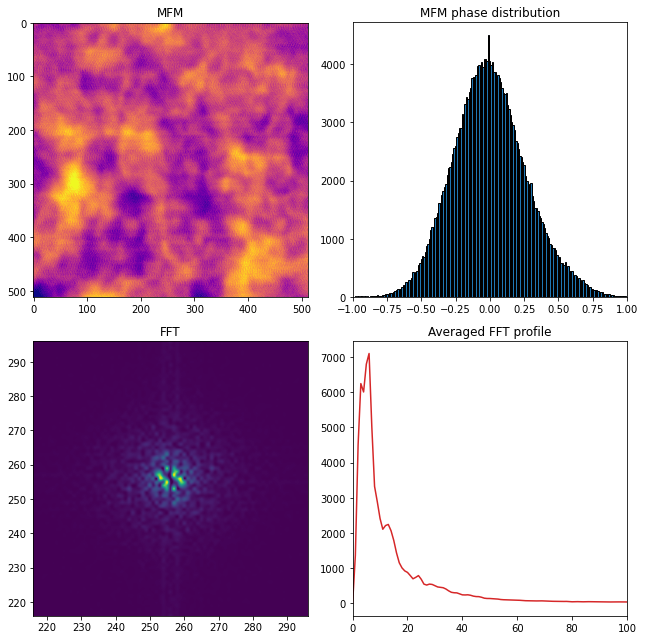

In [27]:
# Plot everything
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
ax[0, 0].imshow(data, vmin = -0.9, vmax=0.9, cmap='plasma')
ax[0, 0].set_title('MFM')
ax[0, 1].hist(flattened_data, bins=np.arange(min(flattened_data), max(flattened_data) + bin_size, bin_size), edgecolor='black')
ax[0, 1].set_title('MFM phase distribution')
ax[0, 1].set_xlim(-1.0, 1.0)
#ax[0, 1].set_ylim(, 0.5)
ax[1, 0].imshow(np.abs(fft_shifted), interpolation = 'spline16', cmap='viridis')
ax[1, 0].set_xlim(216, 296)
ax[1, 0].set_ylim(216, 296)
ax[1, 0].set_title('FFT')
ax[1, 1].plot(zi_av, 'tab:red')
ax[1, 1].set_xlim(0, 100)
ax[1, 1].set_title('Averaged FFT profile')
fig.tight_layout()
plt.show()


# Multiple MFM images processor

In [2]:
import numpy as np
from matplotlib import pylab as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import scipy.ndimage
import math 

path = 'C:/Users/e0546063/python_projects/spin_glass/140_nm_-_mfield'
os.chdir(path)
mypath = os.getcwd()
#print(mypath)

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] == "asc"]
#files

for file in files:
    data = np.loadtxt(file)
    # Compute histogram
    flattened_data = data.flatten()
    bin_size = 0.01
    hist, bins = np.histogram(flattened_data, bins=np.arange(min(flattened_data), max(flattened_data) + bin_size, bin_size))
    # Compute the 2D FFT
    fft_data = np.fft.fft2(data)
    # Shift zero-frequency component to the center
    fft_shifted = np.fft.fftshift(fft_data)
    
    theta = 0
    n = 360
    zi_sum = 0
    i = 0
    zi = 0
    
    while theta<2*math.pi:
        #print(theta*360/(2*math.pi))
        ro = 256
        xn = len(fft_shifted[0])/2
        yn = len(fft_shifted[1])/2
        x0 = xn #- ro*np.cos(theta)
        y0 = yn #- ro*np.sin(theta)
        x1 = xn + ro*np.cos(theta)
        y1 = yn + ro*np.sin(theta)
        num = 500
        x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
    
        # Extract the values along the line, using cubic interpolation
        zi = scipy.ndimage.map_coordinates(np.abs(fft_shifted), np.vstack((x,y)))    
        zi_sum = zi_sum + zi
        i = i+1
    
        theta = theta + 2*math.pi/n
    
    zi_av = zi_sum/i
    np.savetxt('data.csv', zi_av, delimiter=',')
    
    
    # Plot everything
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
    ax[0, 0].imshow(data, vmin = -0.7, vmax=0.7, cmap='plasma')
    ax[0, 0].set_title('MFM' + file)
    ax[0, 1].hist(flattened_data, bins=np.arange(min(flattened_data), max(flattened_data) + bin_size, bin_size), edgecolor='black')
    ax[0, 1].set_title('MFM phase distribution')
    ax[0, 1].set_xlim(-0.7, 0.7)
    #ax[0, 1].set_ylim(, 0.5)
    ax[1, 0].imshow(np.abs(fft_shifted), interpolation = 'spline16', cmap='viridis')
    ax[1, 0].set_xlim(len(fft_shifted[0])/2 - 20, len(fft_shifted[0])/2 + 20)
    ax[1, 0].set_ylim(len(fft_shifted[1])/2 - 20, len(fft_shifted[1])/2 + 20)
    ax[1, 0].set_title('FFT')
    ax[1, 1].plot(zi_av, 'tab:red')
    ax[1, 1].set_xlim(0, 100)
    ax[1, 1].set_ylim(-50, 2000)
    ax[1, 1].set_title('Averaged FFT profile')
    fig.tight_layout()
    filename = file + '.png'
    plt.savefig(filename, bbox_inches='tight', dpi = 200)
    #plt.show()
    plt.close()
    

In [35]:
import numpy as np
from matplotlib import pylab as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import scipy.ndimage
import math 

path = 'C:/Users/e0546063/python_projects/spin_glass/140_nm_-_mfield'
os.chdir(path)
mypath = os.getcwd()
#print(mypath)

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] == "asc"]
#files

for file in files:
    data = np.loadtxt(file)
    # Compute histogram
    flattened_data = data.flatten()
    bin_size = 0.01
    hist, bins = np.histogram(flattened_data, bins=np.arange(min(flattened_data), max(flattened_data) + bin_size, bin_size))
    # Compute the 2D FFT
    fft_data = np.fft.fft2(data)
    # Shift zero-frequency component to the center
    fft_shifted = np.fft.fftshift(fft_data)
    
    theta = 0
    n = 360
    zi_sum = 0
    i = 0
    zi = 0
    
    while theta<2*math.pi:
        #print(theta*360/(2*math.pi))
        ro = 256
        xn = len(fft_shifted[0])/2
        yn = len(fft_shifted[1])/2
        x0 = xn #- ro*np.cos(theta)
        y0 = yn #- ro*np.sin(theta)
        x1 = xn + ro*np.cos(theta)
        y1 = yn + ro*np.sin(theta)
        num = 500
        x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
    
        # Extract the values along the line, using cubic interpolation
        zi = scipy.ndimage.map_coordinates(np.abs(fft_shifted), np.vstack((x,y)))    
        zi_sum = zi_sum + zi
        i = i+1
    
        theta = theta + 2*math.pi/n
    
    zi_av = zi_sum/i
    print(zi_av)
    np.savetxt('data.csv', zi_av, delimiter=',') 
    

[1.53786309e-12 4.84869051e+02 1.15294273e+03 1.30619380e+03
 1.27095094e+03 1.33920321e+03 1.38533976e+03 1.18320669e+03
 8.61178496e+02 7.13668278e+02 6.56217971e+02 5.85471919e+02
 5.80730014e+02 5.87360670e+02 5.26670907e+02 4.45199209e+02
 4.09308857e+02 4.10558347e+02 3.81349097e+02 3.43721548e+02
 3.51411066e+02 3.59493232e+02 3.35484241e+02 3.00288494e+02
 2.82865077e+02 2.88494886e+02 2.83872249e+02 2.54815585e+02
 2.16487602e+02 1.92416003e+02 1.91725701e+02 1.89487463e+02
 1.79918615e+02 1.73178218e+02 1.58370736e+02 1.37963107e+02
 1.26405966e+02 1.21000981e+02 1.15574160e+02 1.08830616e+02
 1.01648145e+02 9.72472836e+01 9.08890002e+01 8.25558437e+01
 7.99067756e+01 7.82117303e+01 7.04805099e+01 6.45653475e+01
 6.55771449e+01 6.43897611e+01 6.06193425e+01 5.83745860e+01
 5.33375352e+01 4.60998581e+01 4.32548970e+01 4.61581501e+01
 4.86903453e+01 4.74122454e+01 4.47951027e+01 4.30246045e+01
 4.23034866e+01 4.06731501e+01 3.76671790e+01 3.57072002e+01
 3.56077269e+01 3.671124

[3.40465335e-13 2.79829221e+02 7.86592665e+02 1.12190890e+03
 1.28656724e+03 1.39126570e+03 1.37294801e+03 1.06174938e+03
 6.57336048e+02 5.93484692e+02 6.93516173e+02 6.00792415e+02
 4.72424705e+02 4.60797284e+02 4.63213608e+02 4.13397335e+02
 3.66215604e+02 3.31114638e+02 2.60339785e+02 2.07576994e+02
 2.21528549e+02 2.31812556e+02 2.03088122e+02 1.79457289e+02
 1.72146681e+02 1.64725137e+02 1.44504092e+02 1.16940019e+02
 1.03542719e+02 1.05399675e+02 1.05488133e+02 9.83563959e+01
 9.37117256e+01 9.24556937e+01 8.56871550e+01 7.70267622e+01
 7.43251160e+01 7.41008332e+01 7.44505840e+01 7.40447040e+01
 6.95569744e+01 6.44861246e+01 6.07361023e+01 5.86207651e+01
 6.03317104e+01 5.92640259e+01 4.98935384e+01 4.10343724e+01
 3.98397816e+01 4.13569182e+01 4.16359026e+01 4.03849738e+01
 3.72613056e+01 3.45343289e+01 3.30825488e+01 3.23298216e+01
 3.24289433e+01 3.18945502e+01 3.06661254e+01 3.16209573e+01
 3.42351754e+01 3.58337074e+01 3.48665649e+01 3.13733091e+01
 3.06653877e+01 3.528866

[1.38600538e-12 3.33349497e+02 1.07516892e+03 1.60570038e+03
 1.76204503e+03 1.96512323e+03 2.01394899e+03 1.50239726e+03
 9.35148466e+02 8.68920308e+02 9.56052302e+02 8.20524118e+02
 6.65648457e+02 6.39812503e+02 6.60971594e+02 6.35468768e+02
 5.92776257e+02 5.88243515e+02 5.41926313e+02 4.85762803e+02
 5.21755232e+02 5.42722971e+02 4.81226624e+02 4.33346286e+02
 4.24687348e+02 4.17661842e+02 3.95786497e+02 3.58321810e+02
 3.11544614e+02 2.91461356e+02 3.10918318e+02 2.99292388e+02
 2.59335422e+02 2.57316488e+02 2.61854553e+02 2.43323565e+02
 2.24953653e+02 2.08955249e+02 2.03906905e+02 2.05654089e+02
 1.90084824e+02 1.73037018e+02 1.66131052e+02 1.57838691e+02
 1.53187092e+02 1.52428911e+02 1.45015186e+02 1.33298148e+02
 1.22251882e+02 1.11448580e+02 1.04663971e+02 1.02608511e+02
 1.00489615e+02 9.43988118e+01 8.42401017e+01 7.70132173e+01
 7.79516809e+01 7.87525759e+01 7.17581883e+01 6.35497640e+01
 6.14650670e+01 6.37921621e+01 6.47157494e+01 6.34588430e+01
 5.98518984e+01 5.246656

[5.29887563e-01 2.64426637e+02 1.24973911e+03 2.06294776e+03
 1.98906266e+03 2.09191172e+03 2.27696435e+03 1.71559757e+03
 9.95295509e+02 8.16407334e+02 8.30250838e+02 7.14446162e+02
 6.53570775e+02 6.45429308e+02 5.87917427e+02 5.22396665e+02
 4.61806416e+02 3.90620656e+02 3.31386213e+02 3.02116992e+02
 2.87517199e+02 2.54117186e+02 2.15563418e+02 2.15831825e+02
 2.26797879e+02 2.13711205e+02 1.94965179e+02 1.70771427e+02
 1.42386766e+02 1.29779411e+02 1.27016196e+02 1.21875725e+02
 1.15358820e+02 1.06969552e+02 9.66537357e+01 8.58989574e+01
 7.80743649e+01 7.46567615e+01 7.16437506e+01 7.17707218e+01
 7.44307299e+01 6.96788482e+01 6.23050786e+01 5.95235248e+01
 5.60031351e+01 5.14780451e+01 5.01212831e+01 4.96938688e+01
 4.80590615e+01 4.68458204e+01 4.62805425e+01 4.67462902e+01
 4.80529386e+01 4.68879845e+01 4.35597081e+01 4.15625014e+01
 4.15703346e+01 4.07142104e+01 3.78302135e+01 3.66272098e+01
 3.84642398e+01 3.95243513e+01 3.70182185e+01 3.31580816e+01
 3.18504175e+01 3.330028

KeyboardInterrupt: 